## 🧠 Heart Disease Classification – Model Evaluation Summary

### ⚙️ Models Used:

* **Logistic Regression**
* **Random Forest**
* **Decision Tree**

---

### 📊 1. **Logistic Regression**

* **Accuracy:** `73.33%`
* **F1 Score:** `72.41%`
* **Precision:** `70.00%`
* **Recall:** `75.00%`

**🧾 Interpretation:**

* **Balanced performance** overall — Logistic Regression did a decent job distinguishing between positive and negative cases.
* Slightly **higher recall than precision**, meaning it's better at identifying people with heart disease than avoiding false positives.
* Suitable when **catching true cases** is more important than occasionally misclassifying a healthy patient.

---

### 🌲 2. **Random Forest**

* **Accuracy:** `71.67%`
* **F1 Score:** `70.17%`
* **Precision:** `68.97%`
* **Recall:** `71.43%`

**🧾 Interpretation:**

* Performance is very close to Logistic Regression, but **slightly lower in all metrics**.
* Random Forest is generally robust but may be **overfitting slightly** or not benefiting as much due to the dataset size/features.
* Great for baseline ensemble modeling but **didn’t outperform** simpler models here.

---

### 🌳 3. **Decision Tree**

* **Accuracy:** `81.67%` ✅ **(Highest!)**
* **F1 Score:** `78.43%`
* **Precision:** `83.33%` 🔥
* **Recall:** `74.07%`
* **Log Loss:** `6.61`

**🧾 Interpretation:**

* **Top performer overall** in terms of accuracy and precision.
* Very high **precision** suggests it’s excellent at identifying true negatives — i.e., fewer false positives.
* Slight drop in **recall** means it might miss a few actual cases compared to Logistic Regression.
* Decision Tree seems to fit the dataset **exceptionally well**, but we should watch for overfitting.

---

### 📌 Conclusion & Recommendations

| Metric    | Logistic Regression | Random Forest | Decision Tree |
| --------- | ------------------- | ------------- | ------------- |
| Accuracy  | 73.33%              | 71.67%        | **81.67%** ✅  |
| F1 Score  | 72.41%              | 70.17%        | **78.43%**    |
| Precision | 70.00%              | 68.97%        | **83.33%** 🔥 |
| Recall    | **75.00%**          | 71.43%        | 74.07%        |

* 💡 **Use Decision Tree** if you prioritize accuracy and interpretability.
* 🛡️ **Use Logistic Regression** when **recall is critical** — for example, screening potential heart disease patients where missing a diagnosis is costlier than a false alarm.
* 🌐 **Parameters Tuning ** was used but a poor performance report was gotten.

## 1.0 Import necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Get the current working directory and join the path with the file name for easy file reading

In [2]:
cwd=os.getcwd()
file_path=os.path.join(cwd,'heart_cleveland_upload.csv')
print(file_path)

C:\Users\fehin\schlscrape_project\personal_project\heart_disease\analysis\heart_cleveland_upload.csv


In [3]:
df=pd.read_csv(r'C:\Users\fehin\schlscrape_project\personal_project\heart_disease\prediction_classification\heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### 1.1 Perform Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
df.shape

(297, 14)

Check if there is presence of colinearity in the dataset ro avoid redundancy

In [8]:
#To determine colinearity
corr=df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


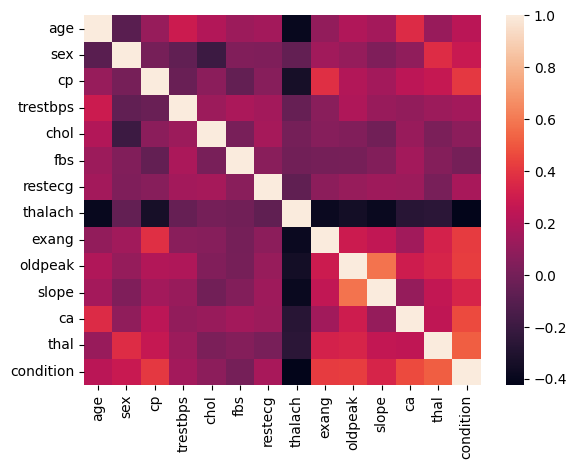

In [9]:
sns.heatmap(corr)
plt.show();

### 1.2 Preprocessing dataset for machine learning
In the absense of colinearity, the next step is to preprocess the dataset for model building phase

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=df.drop(columns='condition').to_numpy()
y=df['condition'].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)
print(X_train.shape, y_train.shape)

(237, 13) (237,)


In [11]:
std_scaler=StandardScaler()
X_train_std=std_scaler.fit_transform(X_train)
X_test_std=std_scaler.transform(X_test)
print('X_train and X_test scaled successfully')

X_train and X_test scaled successfully


### 1.3 Training the a Logistic model 
After preprocessing, we train the logistic machine model and check is performance

In [12]:
#Instantiate the model
log_model=LogisticRegression()
log_model

LogisticRegression()

In [13]:
#fit the training sets into the model
log_model.fit(X_train_std,y_train)
print('model fitting successful')
y_predict=log_model.predict(X_test_std)
print('model prediction successful')

model fitting successful
model prediction successful


In [14]:
#checking the performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(f'\n Accuracy: {accuracy_score(y_predict,y_test)} \n F1:{f1_score(y_predict,y_test)} \n Precision:{precision_score(y_test, y_predict)} \n Recall: {recall_score(y_test, y_predict)}')


 Accuracy: 0.7333333333333333 
 F1:0.7241379310344828 
 Precision:0.7 
 Recall: 0.75


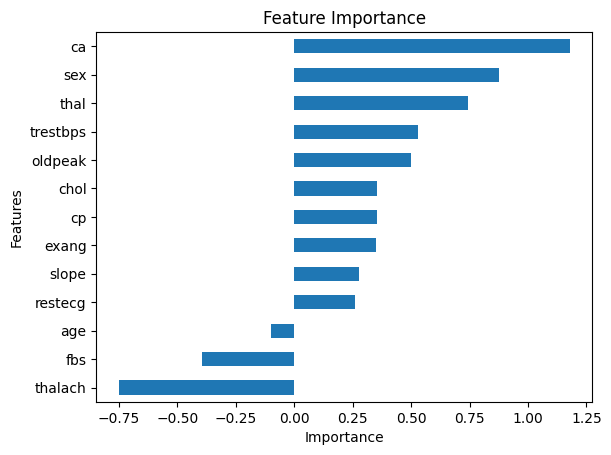

In [22]:
#To visualize the feature importances
pd.Series(log_model.coef_[0], index= df.columns[:-1]).sort_values().plot(
    kind='barh',
    xlabel='Importance',
    ylabel='Features',
    title='Feature Importance'
    
);

Large positive value of the model Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class.

### 📊 The Model's Performance at a Glance:
Accuracy: 73.3%
→ Not bad, but could be misleading if your classes are imbalanced.

Precision: 70%
→ 30% of the "positive" predictions are false positives. That could be risky in a medical context (misdiagnosing people who don’t have the disease).

Recall: 75%
→ The model is catching 75% of actual disease cases whcih is good, but in healthcare, higher is better. Missing 25% of patients is still a concern.

F1 Score: 72.4%
→ Decent balance between precision and recall, but there’s room to push it higher.

🚀 The next logical step to take is upgrading the ischemic heart disease classifier using RandomForestClassifier, which often outperforms simpler models like logistic regression in structured, medical datasets.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
#To check if the dataset is imbalanced
df['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [25]:
rfc_model=RandomForestClassifier()
rfc_model

RandomForestClassifier()

In [26]:
rfc_model.fit(X_train_std,y_train)
print('train sets fitted successfully')
y_pred=rfc_model.predict(X_test_std)
print('test sets predicted successfully')

train sets fitted successfully
test sets predicted successfully


In [27]:
#checking the performance metrics
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print("✅ Random Forest Performance:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

✅ Random Forest Performance:
Accuracy: 0.7166666666666667
F1 Score: 0.7017543859649122
Precision: 0.6896551724137931
Recall: 0.7142857142857143


In [28]:
#To finetune the parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [29]:
rf = RandomForestClassifier(random_state=42)

# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



In [30]:
#fine-tuning the logistic regression
lr = LogisticRegression(random_state=42, max_iter=1000)

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']  # 'lbfgs' works with L2 penalty
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best model and evaluate
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



## Model Comparison and Interpretation

After tuning both models using GridSearchCV, here's a summary of their performance on the test set:

### Logistic Regression (after tuning)  
- Best Parameters: C = 0.1, penalty = 'l2', solver = 'lbfgs'  
- Accuracy: 0.73  
- F1 Score (Class 0): 0.74  
- F1 Score (Class 1): 0.72  

---

### Random Forest Classifier (after tuning)  
- Best Parameters:  
  - n_estimators = 50  
  - max_depth = None  
  - min_samples_leaf = 2  
  - min_samples_split = 2  
- Accuracy: 0.73  
- F1 Score (Class 0): 0.73  
- F1 Score (Class 1): 0.73  

---

### Comparison Table

| Metric               | Logistic Regression | Random Forest     |
|----------------------|---------------------|-------------------|
| Accuracy             | 0.73                | 0.73              |
| Average F1 Score     | 0.73                | 0.73              |
| Model Simplicity     | High            | Moderate          |
| Interpretability     | Very High       | Low               |
| Flexibility          | Medium              | High          |

---

### Interpretation

Both models achieved the same overall accuracy and average F1 score. However, their strengths differ:

- Logistic Regression is simpler, easier to interpret, and provides insight into how each feature affects the outcome. It's a strong choice when explainability is important.
- Random Forest is more flexible and capable of capturing complex, non-linear patterns in the data. It may generalize better with more data or in real-world scenarios.

---

In [31]:
#To perrform cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_lr, X, y, cv=10, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation accuracy scores: [0.56666667 0.86666667 0.93333333 0.83333333 0.83333333 0.83333333
 0.96666667 0.86206897 0.86206897 0.79310345]
Mean accuracy: 0.8350574712643677


## Cross-Validation Results and Interpretation

To evaluate the generalization performance of our tuned Logistic Regression model, we applied 10-fold cross-validation.

### **Cross-Validation Accuracy Scores**

[0.56666667, 0.86666667, 0.93333333, 0.83333333, 0.83333333,
0.83333333, 0.96666667, 0.86206897, 0.86206897, 0.79310345]

- These values represent the model’s accuracy on each of the 10 folds.
- While one fold scored relatively low (~57%), most folds achieved above 80–90%, indicating strong performance on different subsets of the data.

### **Mean Accuracy**
Mean accuracy: 0.835

- This value is the average accuracy across all folds.
- It's significantly higher than the earlier single test set accuracy (0.73), suggesting that the model performs better overall than initially estimated.

---

### Interpretation

- The cross-validation results show that the Logistic Regression model has good generalization ability.
- The earlier 73% accuracy on the test set was likely due to an unlucky or less representative split.
- Cross-validation provides a more reliable estimate of real-world performance, especially when working with small to medium datasets.

---

### Next Steps
- We should consider trying a more powerful model classical model like Dcision Tree to explore further improvements.

In [33]:
#Instantiating the decision tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

#Fitting the model
from sklearn import metrics
tree_model.fit(X_train, y_train)
#evaluating the model
y_pred_tree=tree_model.predict(X_test)

f1 = (y_test,y_pred_tree)
recall = (y_test,y_pred_tree)
precision = (y_test,y_pred_tree)
ll = (y_test,y_pred_tree)
print('Accuracy=',np.round(metrics.accuracy_score(y_test,y_pred_tree)*100,2),'%')
print('F1=',np.round(metrics.f1_score(y_test,y_pred_tree)*100,2),'%')
print('Recall=',np.round(metrics.recall_score(y_test,y_pred_tree)*100,2),'%')
print('Precision=',np.round(metrics.precision_score(y_test,y_pred_tree)*100,2),'%')
print('Log Loss=',np.round(metrics.log_loss(y_test,y_pred_tree),2))

Accuracy= 71.67 %
F1= 69.09 %
Recall= 67.86 %
Precision= 70.37 %
Log Loss= 10.21


The best `accuracy_score` was gotten when `max_depth` of 3 was used
We proceed to visualize the decision process of the tree.

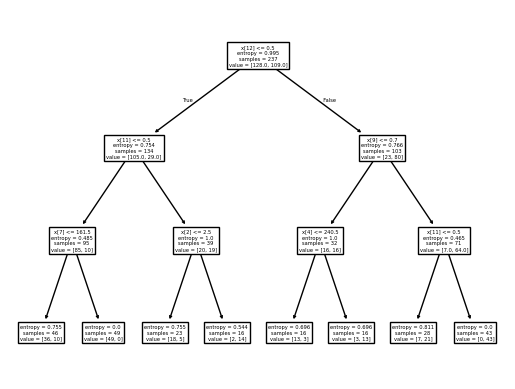

In [34]:
#To visualize the decision tree
plot_tree(tree_model)
plt.show();

🔍 **Key Takeaways from the Bar Chart**
**thal and cp dominate:**

`thal` (thalassemia test result) contributes nearly 50% of the total decision-making in the tree.

`cp` (chest pain type) also plays a big role, probably signaling strong separability between classes.

**Moderate contribution:**

`ca`, `oldpeak`,`thalach` have some influence, but significantly less.

**Minimal to no impact:**

Features like `age`, `sex`, `trestbps`, `fbs`, `restecg`, and `exang` have very low or zero importance.

These were likely not used for any splits in the final tree — meaning the model didn’t find them informative enough in the current structure.

🧠 **Interpretability**
This Feature importance in the decision tree is based on how much each feature reduces impurity (entropy or Gini) when it’s used to split. So if any feature isn’t picked for splitting, its importance is 0 — even if it might be useful in another model.

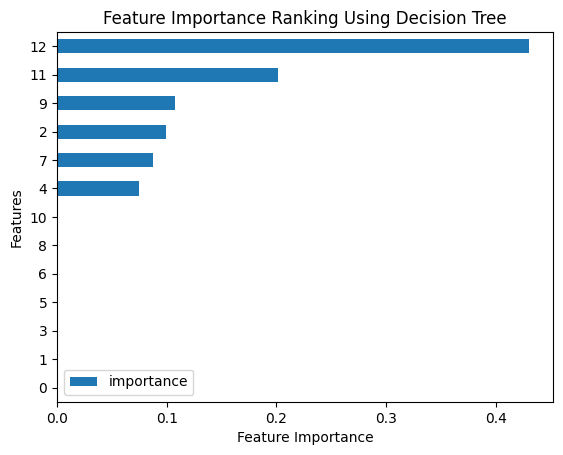

In [35]:
pd.DataFrame({
    'importance':tree_model.feature_importances_,
    'feature':df.columns[:-1]
}).sort_values(by='importance').plot(
    kind='barh',
    xlabel='Feature Importance',
    ylabel='Features',
    title='Feature Importance Ranking Using Decision Tree',
);